In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/cities.csv")

In [3]:
df.shape

(417, 2)

In [4]:
df_sorted = df.sort_values('active_posts',ascending=False)

In [5]:
df = df_sorted[df_sorted.active_posts>300]

In [6]:
df.shape

(45, 2)

In [7]:
import re
def getroot(url):
    m = re.search(".*craigslist.org",url)
    root_url = m.group(0)
    return root_url

In [8]:
urls_to_scrape = df_sorted[df_sorted.active_posts>300].url.tolist()

start_urls = ["https://newyork.craigslist.org/search/muc",
              "https://boston.craigslist.org/search/muc",
              "https://seattle.craigslist.org/search/muc",
              "https://losangeles.craigslist.org/search/muc",
              "https://nashville.craigslist.org/search/muc",
              "https://portland.craigslist.org/search/muc",
              "https://denver.craigslist.org/search/muc",
              "https://detroit.craigslist.org/search/muc",
              "https://sfbay.craigslist.org/search/muc",
              "https://atlanta.craigslist.org/search/muc",
              "https://miami.craigslist.org/search/muc",
              "https://washingtondc.craigslist.org/search/muc",
              "https://philadelphia.craigslist.org/search/muc",
              "https://chicago.craigslist.org/search/muc",
              "https://dallas.craigslist.org/search/muc"]

In [9]:
urls_to_scrape = [getroot(url) for url in urls_to_scrape]
start_urls = [getroot(url) for url in start_urls]
new_urls_scrape = list(set(urls_to_scrape) ^ set(start_urls))
new_urls_scrape = [url+"/search/muc" for url in new_urls_scrape]

In [10]:
df['city name'] = df_sorted.url.apply(lambda x: re.sub('.craigslist.org','',getroot(x)[8:]))

/home/rjh336/anaconda2/envs/metis/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

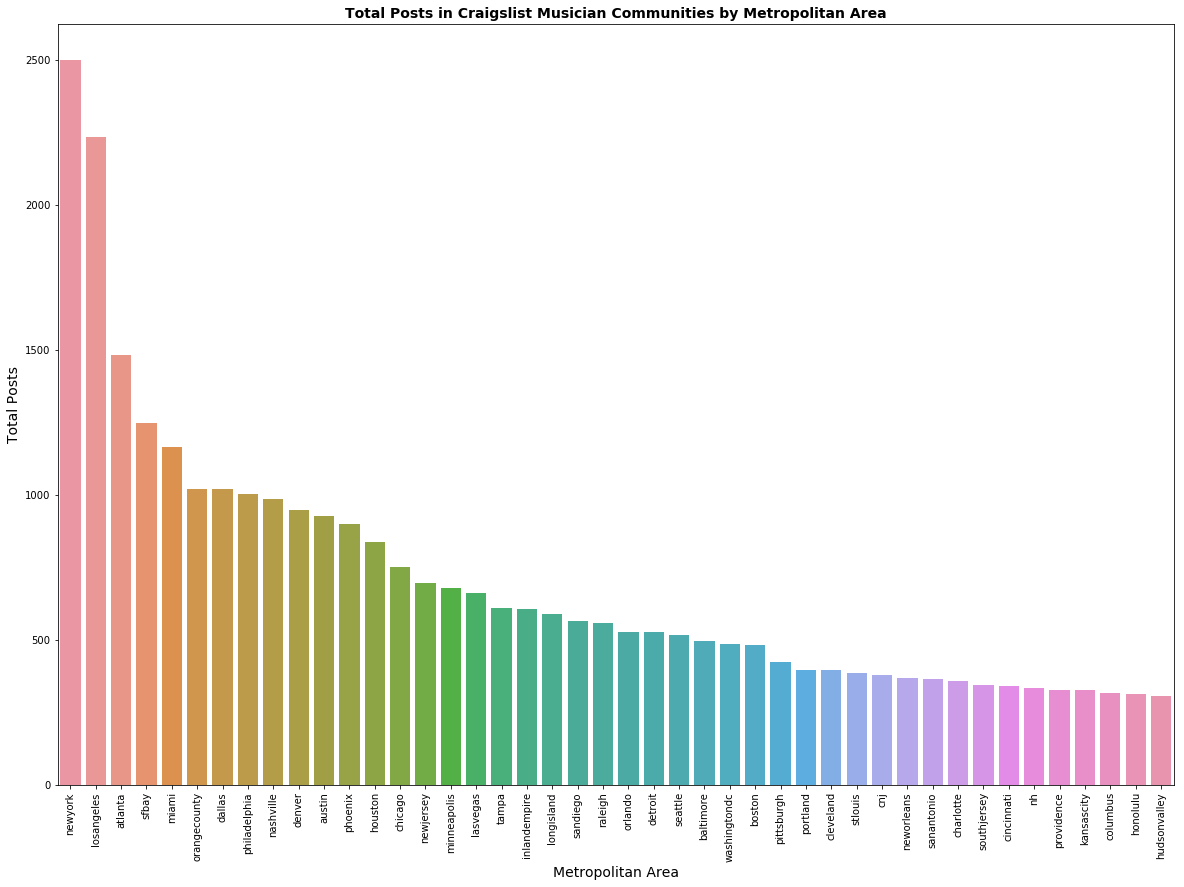

In [19]:
fig, ax = plt.subplots(figsize=(20,14))
bp = sns.barplot(x='city name', y='active_posts', data=df, orient='v')
ax.set_xlabel("Metropolitan Area", fontsize=14)
ax.set_ylabel("Total Posts", fontsize=14)
# ax.set_yticklabels(df['city name'].values, fontsize=12)
# ax.set_xticklabels([0,500,1000,1500,2000,2500], fontsize=12)
ax.set_title('Total Posts in Craigslist Musician Communities by Metropolitan Area', fontsize=14, fontweight='bold')
for item in bp.get_xticklabels():
    item.set_rotation(90)